In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [6]:
#Lectura de lps 3csv's
reviews = 'dfReviewsLimpio.csv'
items = 'AgrupItemId.csv'
steamGames= 'steamGamesLimpio.csv'
dfReviews = pd.read_csv(reviews)
dfItems = pd.read_csv(items)
dfSteamGames = pd.read_csv(steamGames)

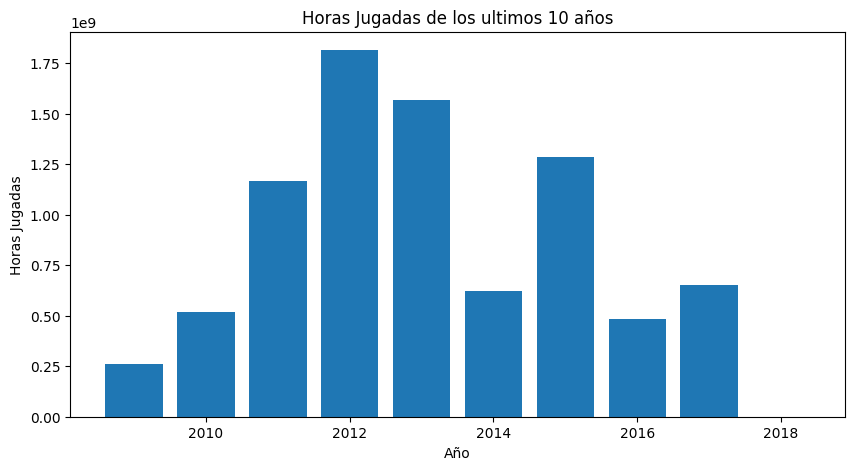

In [51]:
dfItemsGroupItemIdF1 = dfItems.groupby('item_id')['playtime_forever'].sum().reset_index()
# Hacer el merg de las tablas
itemsSteamGamesF1 = pd.merge(dfItemsGroupItemIdF1, dfSteamGames, on='item_id', how='inner')
# agrupamos por año  para EL RESULTADO de los ultimos diez año
agrupacionDens1 = itemsSteamGamesF1.groupby(['years'])['playtime_forever'].sum().reset_index()
data_ordenado1 = agrupacionDens1.sort_values(by='years', ascending=False).head(10)
# Crear un histograma
plt.figure(figsize=(10,5))
plt.bar(data_ordenado1['years'], data_ordenado1['playtime_forever'])
plt.xlabel('Año')
plt.ylabel('Horas Jugadas')
plt.title('Horas Jugadas de los ultimos 10 años')

# Mostrar el gráfico de barras
plt.show()

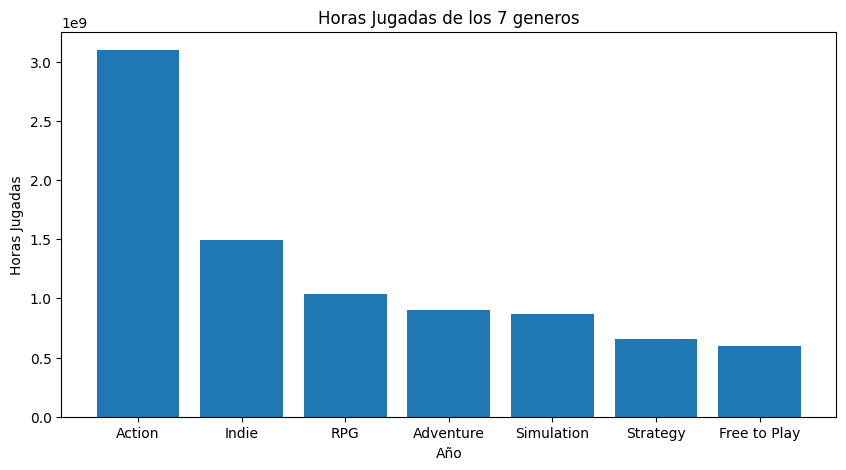

In [56]:
agrupacionDens2 = itemsSteamGamesF1.groupby(['genres'])['playtime_forever'].sum().reset_index()
data_ordenado2 = agrupacionDens2.sort_values(by='playtime_forever', ascending=False).head(7)
# Crear un histograma
plt.figure(figsize=(10,5))
plt.bar(data_ordenado2['genres'], data_ordenado2['playtime_forever'])
plt.xlabel('Año')
plt.ylabel('Horas Jugadas')
plt.title('Horas Jugadas de los 7 generos mas jugados')

# Mostrar el gráfico de barras
plt.show()


In [26]:
#Usaremos un ITEM ID Agrupado por id Item
dfSteamGames

,genres,title,release_date,item_id,years
0,Action,Lost Summoner Kitty,2018-01-04,761140,2018
1,Casual,Lost Summoner Kitty,2018-01-04,761140,2018
2,Indie,Lost Summoner Kitty,2018-01-04,761140,2018
3,Simulation,Lost Summoner Kitty,2018-01-04,761140,2018
4,Strategy,Lost Summoner Kitty,2018-01-04,761140,2018
...,...,...,...,...,...
70697,Indie,Russian Roads,2018-01-04,610660,2018
70698,Racing,Russian Roads,2018-01-04,610660,2018
70699,Simulation,Russian Roads,2018-01-04,610660,2018
70700,Casual,EXIT 2 - Directions,2017-09-02,658870,2017


#EXPLORATORY DATA ANALYSIS (EDA)

In [15]:
dfReviews = dfReviews[['item_id' ,'reviews.helpful','reviews.recommend','sentimiento']]
Nuevo = pd.merge(dfReviews, dfItems, on='item_id', how='inner')


In [ ]:
#Merge
dataFrame = pd.merge(dfItemsGroupItemIdF1, dfSteamGames, on='item_id', how='inner')

In [ ]:
dfSteamGames['item_id','genres'].info()

In [9]:
#Tipos de variables:
# genres = Categorica 
#Title = Categorica
# Release date = Tiempo, asociada a la fecha exact de publicacion en formato yyyy mm dd
# Year = Numerica asociado al año

# Estadistica Descriptiva


In [26]:
agruGameItems = pd.merge(dfSteamGames, dfItems, on='item_id', how='left')
agruTotal = pd.merge(agruGameItems,dfReviews,on='item_id', how='left')

# Podemos ver la cantindad de juegos por cada año por tipo de genero que se dieron 

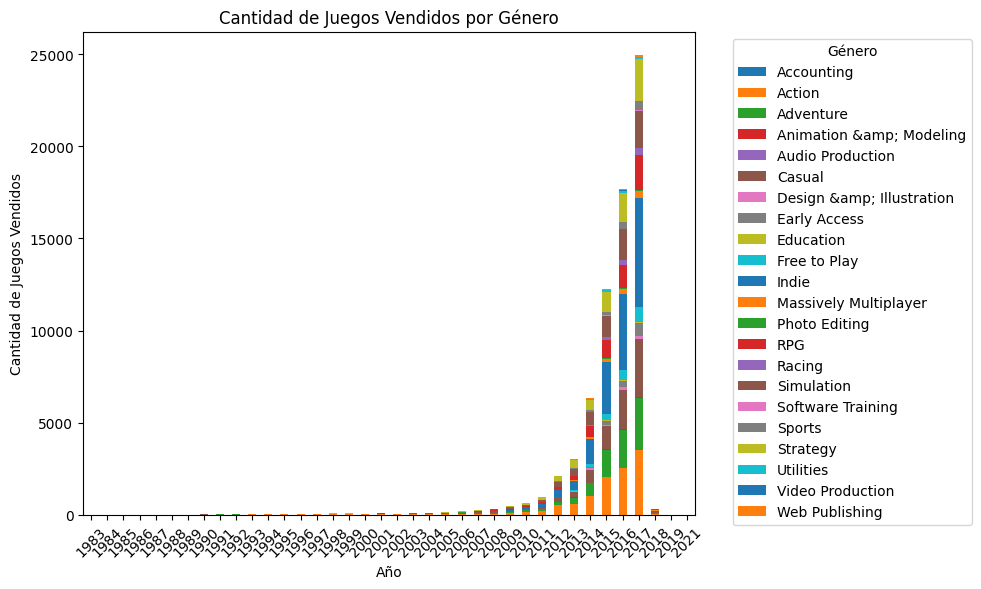

In [19]:
conteo_por_genero_y_año = dfSteamGames.groupby(['years', 'genres']).size().unstack(fill_value=0)

# Creamos el gráfico de barras apiladas
ax = conteo_por_genero_y_año.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizamos el gráfico
plt.title('Cantidad de Juegos Vendidos por Género')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos Vendidos')
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
def recomendacion_juego(product_id, df1, df2, num_recomendaciones=5):
    # Filtrar el DataFrame df1 para obtener la información del juego con el ID de producto proporcionado
    juego_seleccionado = df1[df1['product_id'] == product_id]

    # Obtener características relevantes del juego seleccionado (por ejemplo, género, duración, etc.)
    características_juego = juego_seleccionado[['genre', 'duration', 'otra_caracteristica']]

    # Filtrar el DataFrame df1 para juegos con características similares
    juegos_similares = df1[
        (df1['genre'] == características_juego['genre'].values[0]) &
        (df1['duration'] == características_juego['duration'].values[0]) &
        (df1['otra_caracteristica'] == características_juego['otra_caracteristica'].values[0]) &
        (df1['product_id'] != product_id)  # Excluir el juego seleccionado
    ]

    # Tomar las primeras "num_recomendaciones" filas como recomendaciones
    recomendaciones = juegos_similares.head(num_recomendaciones)

    return recomendaciones

# Ejemplo de uso:
producto_id = 'ID_DEL_JUEGO'
resultados_recomendados = recomendacion_juego(producto_id, df1, df2)
print(resultados_recomendados)